In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import glob 
import pandas as pd
sns.set(style="dark")
plt.rcParams.update({'font.size': 8})

`model_policy_analysis/run_seeds.sh` reruns the final model / policy for each seed 10x. For the hybrid learning method, we analyze the final model and policy separately as well as in combination. So each entry in the table / column in the boxplot is the result of 100 texts (10 trials * 10 seeds)

# table

In [3]:
envs = ['InvertedPendulumRoboschoolEnv','AcrobotEnv','HopperEnv','HalfCheetahEnv']
cols = {'A':'Cartpole Swingup','B':'Acrobot Swingup','C': 'Hopper','E' : 'Half-Cheetah'}
temp_cols = ['A','DA','B','DB','C','DC','E','EE']
rows =  []

table = np.zeros([10,len(envs)*2])
sim_type = []
col_count = 0
for i, env in enumerate(envs):
    row = 0     
    # load data
    boxplot_data = []
    for orig_method, plot_method, row_name in zip(['mpc_','hlt_','sac__','hlt_','hlt_'],
                                    ['model','model','policy','policy','hybrid'],
                                    ['Model-Based','Hybrid Model Only','Model-Free','Hybrid Policy Only','Hybrid Learning']):
        for det_method, det in zip(['deter','stoch'],[True,False]):
            if orig_method[-2] == '_': 
                det_method = ''
            path_dir = '../data/{}{}/{}/{}_test/reward_data_final.pkl'.format(orig_method,det_method,env,plot_method)
            data = pickle.load(open(path_dir, 'rb'))    
    
            # add to table
            table[row,col_count] = np.mean(data).copy()
            table[row,col_count+1] = np.std(data).copy()
            if i == 0:
                rows.append(row_name)
                sim_type.append( '{}'.format('Det.' if det else 'Stoch.'))
            row += 1  
    col_count += 2

In [4]:
# df = pd.DataFrame(data=table, index=rows, columns=temp_cols, dtype= np.int64)
df = pd.DataFrame(data=table, index=rows, columns=temp_cols).round(decimals=1)
out = pd.DataFrame({c: df.filter(like=c).astype(str).apply(' ± '.join, 1) 
                     for c in df.columns.str[-1].unique()})
out = out.rename(columns=cols)
method = pd.DataFrame(sim_type,index=rows)
out.insert(0, '', method)
display(out)
# print(out.to_latex())

,,Cartpole Swingup,Acrobot Swingup,Hopper,Half-Cheetah
Model-Based,Det.,852.1 ± 73.5,-100.2 ± 34.4,8.8 ± 10.6,-188.3 ± 51.2
Model-Based,Stoch.,947.7 ± 39.1,-55.2 ± 13.9,25.5 ± 12.6,-187.2 ± 25.6
Hybrid Model Only,Det.,601.7 ± 263.0,-160.1 ± 79.1,5.7 ± 6.8,-210.4 ± 154.5
Hybrid Model Only,Stoch.,938.6 ± 48.5,-89.5 ± 24.3,66.5 ± 33.4,39.9 ± 253.4
Model-Free,Det.,740.4 ± 197.5,-115.9 ± 59.0,378.7 ± 301.3,-153.1 ± 79.3
Model-Free,Stoch.,740.4 ± 197.5,-115.9 ± 59.0,378.7 ± 301.3,-153.1 ± 79.3
Hybrid Policy Only,Det.,972.3 ± 2.7,-25.8 ± 4.2,1190.8 ± 609.8,1857.2 ± 383.6
Hybrid Policy Only,Stoch.,938.2 ± 161.1,-25.8 ± 6.8,840.5 ± 516.6,3293.8 ± 1546.9
Hybrid Learning,Det.,972.6 ± 2.9,-23.2 ± 8.2,930.6 ± 604.0,1505.4 ± 654.7
Hybrid Learning,Stoch.,972.6 ± 2.2,-24.4 ± 3.6,1407.5 ± 914.7,3843.1 ± 1514.5


# setup for following plots

In [5]:
ymin = [-885,-511,-155,-885]
ymax = [1163,60,3200,6321]

envs = ['InvertedPendulumRoboschoolEnv','AcrobotEnv','HopperEnv','HalfCheetahEnv']
plot_titles = ['(c) Cartpole Swingup', '(b) Acrobot Swingup','(c) Hopper', '(d) Half-Cheetah']

colors = ['#dd8452ff','#bb3f3f', '#55a868ff','tab:brown','#5e80b7ff',
          '#dd8452ff','#bb3f3f', '#55a868ff','tab:brown','#5e80b7ff',]

# boxplot

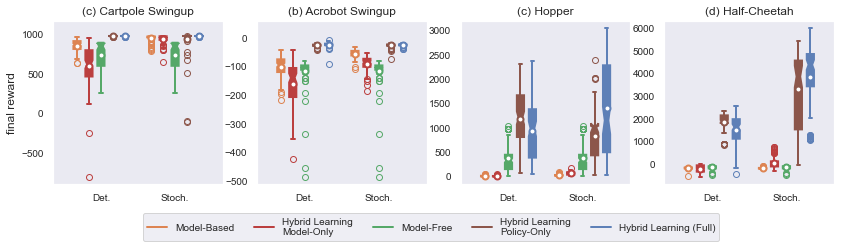

In [81]:
fig, axs = plt.subplots(1, len(envs), figsize=(len(envs)*3+2,3))
for i, env in enumerate(envs):
    # load data
    boxplot_data = []
    for det_method in ['deter','stoch']:
        for orig_method, plot_method in zip(['mpc_','hlt_','sac__','hlt_','hlt_'],
                                            ['model','model','policy','policy','hybrid']):
            if orig_method[-2] == '_': 
                temp_det_method = ''
            else:
                temp_det_method = det_method
            try:
                path_dir = '../data/{}{}/{}/{}_test/reward_data_final.pkl'.format(orig_method,temp_det_method,env,plot_method)
                data = pickle.load(open(path_dir, 'rb'))    
                boxplot_data.append(np.concatenate(data))
            except: 
                boxplot_data.append(np.concatenate(data))   
    # plot
    for row,dd in enumerate(boxplot_data): 
        offset = 0 if row < 5 else 0.3 # spacing between det and stoch
        axs[i].boxplot(dd, positions = [0.25*row+offset], 
                       notch=True, patch_artist=True, 
                       boxprops=dict(facecolor= colors[row], color= colors[row],linewidth=2),
                       capprops=dict(color= colors[row],linewidth=2),
                       whiskerprops=dict(color= colors[row],linewidth=2),
                       flierprops=dict(color= colors[row], markeredgecolor= colors[row]),
                       medianprops=dict(color= colors[row]), showmeans=True,
#                        meanprops = dict(marker='o',markeredgewidth = 2, markersize=4, 
#                                         markeredgecolor='black', markerfacecolor=colors[row])
                       meanprops = dict(marker='o',markeredgewidth = 2, markersize=6, 
                                        markeredgecolor=colors[row], markerfacecolor='white')
                      )

for i in range(len(envs)):
    axs[i].set_title(plot_titles[i],fontsize=12)
    axs[i].set_xticks([0.5,2.05])
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].set_xticklabels(['Det.', 'Stoch.'])
#     [ymin,ymax] = axs[i].get_ylim()
#     print(ymin,ymax)
    axs[i].set_ylim([ymin[i],ymax[i]])
axs[0].set_ylabel('final reward',fontsize=12)

# Finally, add a basic legend
from matplotlib.lines import Line2D
custom_lines = []
for c in colors[:5]:
    custom_lines.append(Line2D([0], [0], color=c, lw=2))
names = [ 'Model-Based','Hybrid Learning\nModel-Only', 'Model-Free', 'Hybrid Learning\nPolicy-Only', 'Hybrid Learning (Full)']
axs[0].legend(custom_lines,names,bbox_to_anchor=(0.5,-0.15), loc="upper left", ncol=5, fontsize=10)


plt.savefig('acrobot_component-analysis_boxpot.pdf', bbox_inches='tight')


# mean

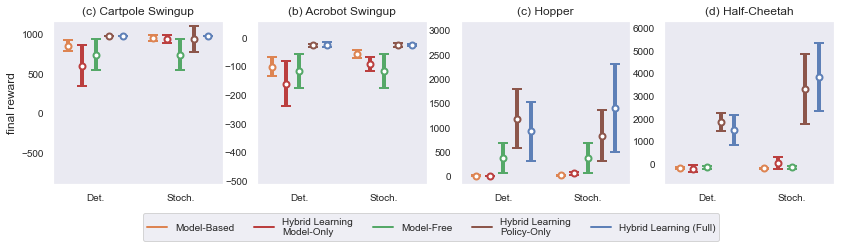

In [83]:
for minmax in [False]:
    fig, axs = plt.subplots(1, len(envs), figsize=(len(envs)*3+2,3))
    for i, env in enumerate(envs):
        # load data
        boxplot_data = []
        for det_method in ['deter','stoch']:
            for orig_method, plot_method in zip(['mpc_','hlt_','sac__','hlt_','hlt_'],
                                                ['model','model','policy','policy','hybrid']):
                if orig_method[-2] == '_': 
                    temp_det_method = ''
                else:
                    temp_det_method = det_method
                path_dir = '../data/{}{}/{}/{}_test/reward_data_final.pkl'.format(orig_method,temp_det_method,env,plot_method)
                data = pickle.load(open(path_dir, 'rb'))    
                data = np.concatenate(data)
                boxplot_data.append([np.mean(data),np.min(data),np.max(data),np.std(data),data]) # np.percentile(data, 25),np.percentile(data, 75)

        # plot
        for row,dd in enumerate(boxplot_data): 
            offset = 0 if row < 5 else 0.3 # spacing between det and stoch
            boxplot_mean,boxplot_min,boxplot_max,boxplot_std,data = dd
            axs[i].errorbar([0.25*row+offset], boxplot_mean, boxplot_std, fmt='ok', markerfacecolor='white',
                                markeredgecolor = colors[row], markeredgewidth = 2, markersize=6, 
                                ecolor=colors[row], lw=4, capsize=5, capthick=4,zorder=1)
            if minmax: 
                axs[i].scatter([0.25*row+offset]*2,[boxplot_min,boxplot_max],marker='X',facecolor='k',color='k',alpha=0.4,linewidth=0.,zorder=2)

    for i in range(len(envs)):
        axs[i].set_title(plot_titles[i],fontsize=12)
        axs[i].set_xticks([.5,2.05])
        axs[i].tick_params(axis='both', which='major', labelsize=10)
        axs[i].set_xticklabels(['Det.', 'Stoch.'])
        axs[i].set_ylim([ymin[i],ymax[i]])
        [xmin,xmax] = axs[i].get_xlim()
        axs[i].set_xlim([xmin-0.15,xmax+.15])

    #     print(ymax)
    axs[0].set_ylabel('final reward',fontsize=12)

    # Finally, add a basic legend
    from matplotlib.lines import Line2D
    custom_lines = []
    for c in colors[:5]:
        custom_lines.append(Line2D([0], [0], color=c, lw=2))
    names = [ 'Model-Based','Hybrid Learning\nModel-Only', 'Model-Free', 'Hybrid Learning\nPolicy-Only', 'Hybrid Learning (Full)']
    axs[0].legend(custom_lines,names,bbox_to_anchor=(0.5,-0.15), loc="upper left", ncol=5, fontsize=10)

    if minmax:
        plt.savefig('acrobot_component-analysis_errorbars-minmax.pdf', bbox_inches='tight')
    else:
        plt.savefig('acrobot_component-analysis_errorbars.pdf', bbox_inches='tight')